In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from io import StringIO

# Load the data
filename = 'lawson.csv'
# filename = 'day8_bld2.csv'
df = pd.read_csv(filename, parse_dates=['Time'])

# Inspect the data
print(df.head())


   ID                Time  Illuminance  instant_motion_detect  \
0   0 2023-12-12 14:31:30          101                      1   
1   0 2023-12-12 14:31:40          109                      0   
2   0 2023-12-12 14:33:08          119                      1   
3   0 2023-12-12 14:33:18          570                      0   
4   0 2023-12-12 14:34:10          534                      1   

   10s_motion_detect  
0                  1  
1                  0  
2                  1  
3                  0  
4                  1  


# 照度と、人感センサーのデータを可視化する

In [48]:
# Filter in rows where ID is 3
df_id_3 = df[df['ID'] == 3]
df_id_3


,ID,Time,Illuminance,instant_motion_detect,10s_motion_detect
6,3,2023-12-12 14:34:33,578,1,1
7,3,2023-12-12 14:34:43,584,0,0
8,3,2023-12-12 14:34:56,526,0,0
9,3,2023-12-12 14:35:09,595,0,0
10,3,2023-12-12 14:35:22,541,1,1
...,...,...,...,...,...
670,3,2023-12-12 16:27:53,44,1,1
671,3,2023-12-12 16:28:03,33,0,0
672,3,2023-12-12 16:28:13,33,0,0
673,3,2023-12-12 16:28:24,165,0,0


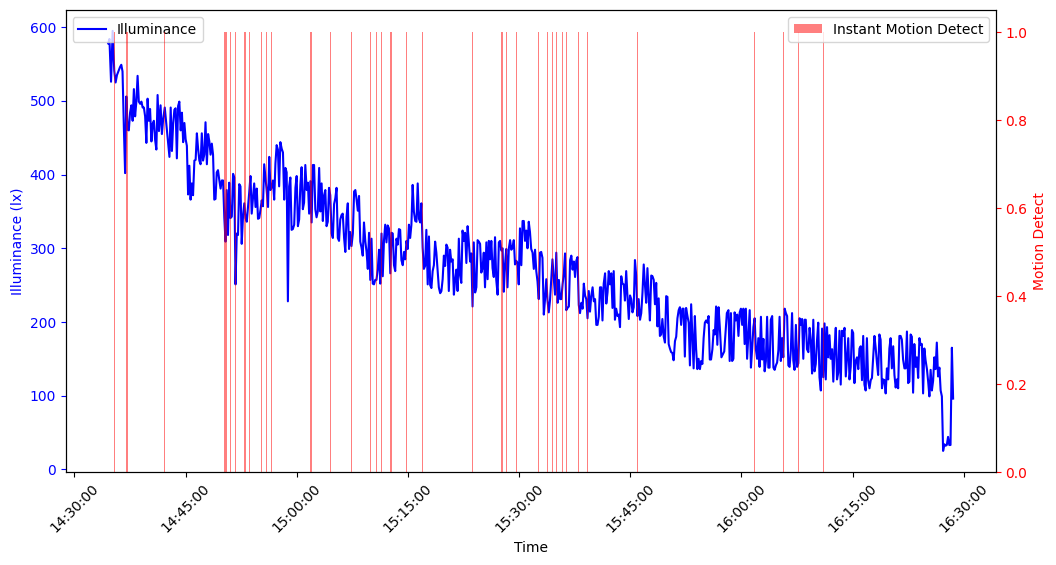

In [49]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Illuminance as a line plot
ax1.plot(df_id_3['Time'], df_id_3['Illuminance'], color='b', label='Illuminance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Illuminance (lx)', color='b')
ax1.tick_params('y', colors='b')

# Setting the x-axis as date format
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)

# Creating a secondary axis for motion detect
ax2 = ax1.twinx()
ax2.bar(df_id_3['Time'], df_id_3['instant_motion_detect'], width=0.00005, alpha=0.5, color='r', label='Instant Motion Detect')
ax2.set_ylabel('Motion Detect', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.title('Illuminance and Motion Detect Over Time for ID 3')
# plt.xlim(df_id_3['Time'].iloc[-200], df_id_3['Time'].iloc[-1])
plt.savefig('../img/lawson_overall.png', bbox_inches='tight')
plt.show()

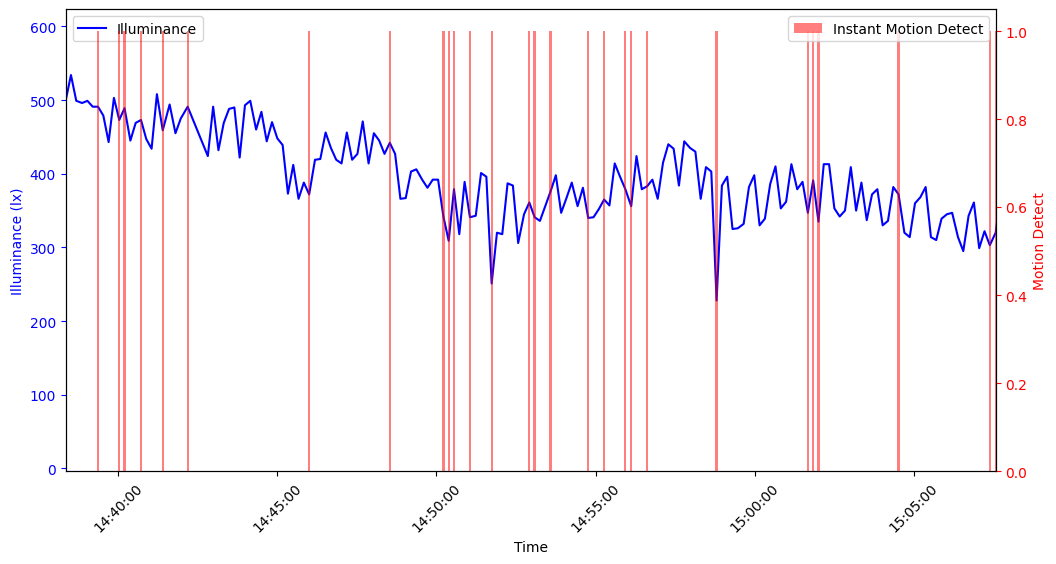

In [50]:

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Illuminance as a line plot
ax1.plot(df_id_3['Time'], df_id_3['Illuminance'], color='b', label='Illuminance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Illuminance (lx)', color='b')
ax1.tick_params('y', colors='b')

# Setting the x-axis as date format
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)

# Creating a secondary axis for motion detect
ax2 = ax1.twinx()
ax2.bar(df_id_3['Time'], df_id_3['instant_motion_detect'], width=0.00005, alpha=0.5, color='r', label='Instant Motion Detect')
ax2.set_ylabel('Motion Detect', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.title('Illuminance and Motion Detect Over Time for ID 3')
plt.xlim(df_id_3['Time'].iloc[20], df_id_3['Time'].iloc[190])
plt.savefig('../img/lawson_upclose.png', bbox_inches='tight')
plt.show()

In [51]:

df_id_3['Time'].iloc[10]

Timestamp('2023-12-12 14:36:40')

# 照度のデータが振動しているので、移動平均を取る。

In [52]:
window_size = 3
df_id_3['Illuminance_MA3'] = df_id_3['Illuminance'].rolling(window=window_size).mean()
df_id_3.head()


/tmp/ipykernel_24966/2181506644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_3['Illuminance_MA3'] = df_id_3['Illuminance'].rolling(window=window_size).mean()


,ID,Time,Illuminance,instant_motion_detect,10s_motion_detect,Illuminance_MA3
6,3,2023-12-12 14:34:33,578,1,1,NaN
7,3,2023-12-12 14:34:43,584,0,0,NaN
8,3,2023-12-12 14:34:56,526,0,0,562.666667
9,3,2023-12-12 14:35:09,595,0,0,568.333333
10,3,2023-12-12 14:35:22,541,1,1,554.000000


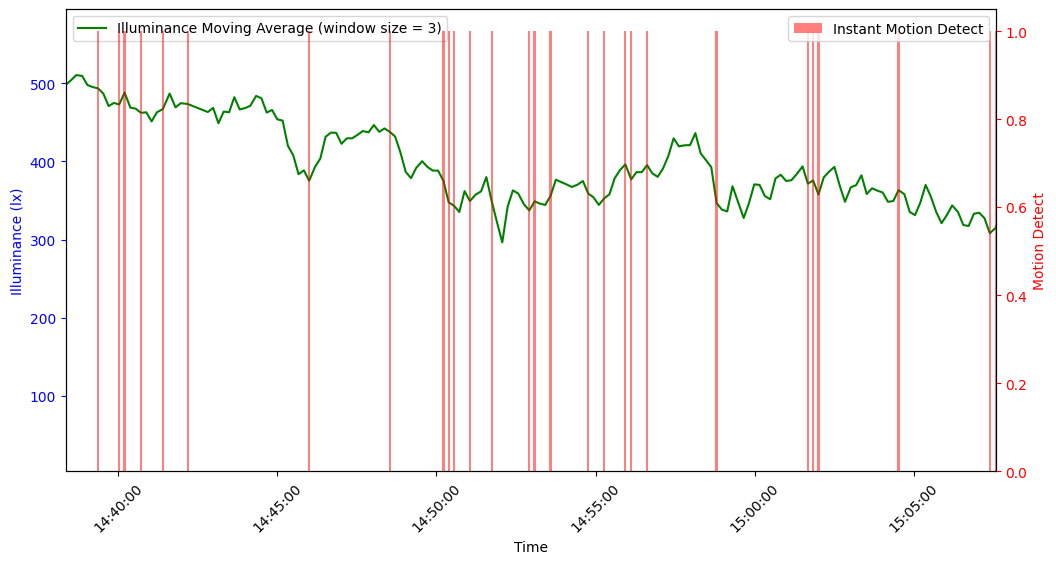

In [53]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Illuminance as a line plot
# ax1.plot(df_id_3['Time'], df_id_3['Illuminance'], color='b', label='Illuminance')
ax1.plot(df_id_3['Time'], df_id_3['Illuminance_MA3'], color='g', label='Illuminance Moving Average (window size = 3)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Illuminance (lx)', color='b')
ax1.tick_params('y', colors='b')

# Setting the x-axis as date format
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)

# Creating a secondary axis for motion detect
ax2 = ax1.twinx()
ax2.bar(df_id_3['Time'], df_id_3['instant_motion_detect'], width=0.00005, alpha=0.5, color='r', label='Instant Motion Detect')
ax2.set_ylabel('Motion Detect', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.title('Illuminance and Motion Detect Over Time for ID 3')
plt.xlim(df_id_3['Time'].iloc[20], df_id_3['Time'].iloc[190])
plt.savefig('../img/lawson_upclose_average.png', bbox_inches='tight')
plt.show()

# 241教室のデータ

In [54]:

# filename = 'familymart.csv'
filename = 'day8_bld2.csv'
df = pd.read_csv(filename, parse_dates=['Time'])
# df = pd.read_csv('familymart.csv')

# Inspect the data
print(df.head())


   ID                Time  Illuminance  instant_motion_detect  \
0   3 2023-12-18 13:17:40           67                      0   
1   3 2023-12-18 13:17:50           67                      0   
2   3 2023-12-18 13:18:00           67                      0   
3   3 2023-12-18 13:18:10           67                      0   
4   3 2023-12-18 13:18:20           67                      0   

   10s_motion_detect  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [55]:
# Filter rows where ID is 3
df_id_3 = df[df['ID'] == 3]
df_id_3

,ID,Time,Illuminance,instant_motion_detect,10s_motion_detect
0,3,2023-12-18 13:17:40,67,0,0
1,3,2023-12-18 13:17:50,67,0,0
2,3,2023-12-18 13:18:00,67,0,0
3,3,2023-12-18 13:18:10,67,0,0
4,3,2023-12-18 13:18:20,67,0,0
...,...,...,...,...,...
1040,3,2023-12-18 16:14:29,52,0,0
1041,3,2023-12-18 16:14:39,52,0,0
1042,3,2023-12-18 16:14:49,52,0,0
1043,3,2023-12-18 16:14:59,52,0,0


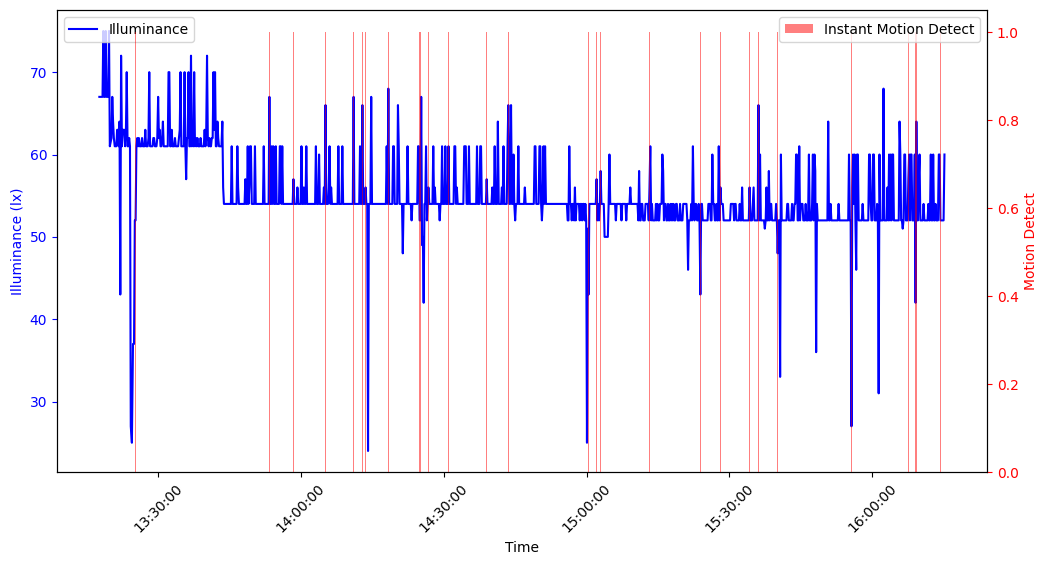

In [56]:

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Illuminance as a line plot
ax1.plot(df_id_3['Time'], df_id_3['Illuminance'], color='b', label='Illuminance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Illuminance (lx)', color='b')
ax1.tick_params('y', colors='b')

# Setting the x-axis as date format
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)

# Creating a secondary axis for motion detect
ax2 = ax1.twinx()
ax2.bar(df_id_3['Time'], df_id_3['instant_motion_detect'], width=0.00005, alpha=0.5, color='r', label='Instant Motion Detect')
ax2.set_ylabel('Motion Detect', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.title('Illuminance and Motion Detect Over Time for ID 3')
# plt.xlim(df_id_3['Time'].iloc[-200], df_id_3['Time'].iloc[-1])
plt.savefig('../img/241.png', bbox_inches='tight')
plt.show()

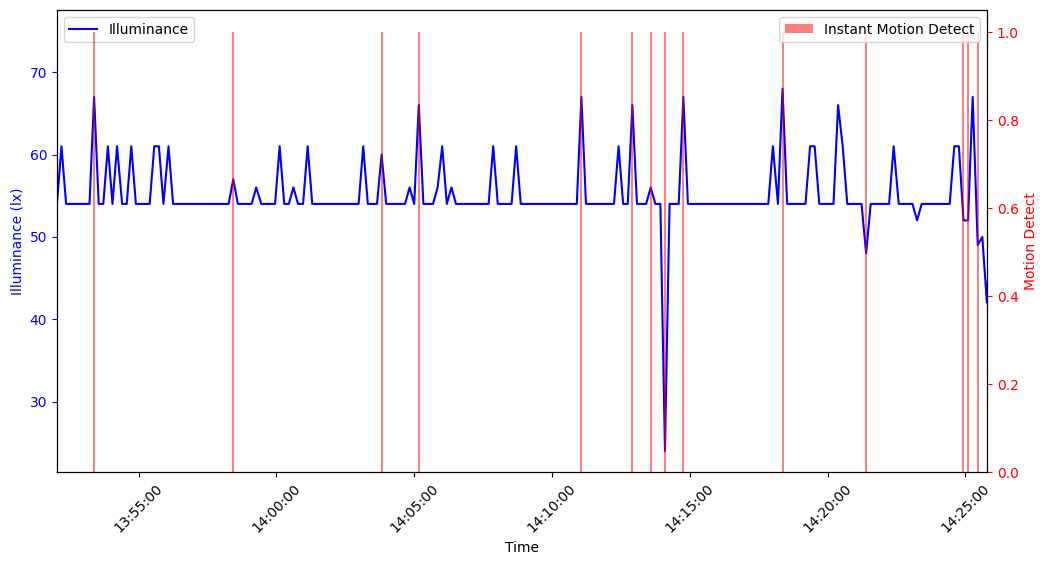

In [57]:

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Illuminance as a line plot
ax1.plot(df_id_3['Time'], df_id_3['Illuminance'], color='b', label='Illuminance')
ax1.set_xlabel('Time')
ax1.set_ylabel('Illuminance (lx)', color='b')
ax1.tick_params('y', colors='b')

# Setting the x-axis as date format
ax1.xaxis.set_major_formatter(DateFormatter("%H:%M:%S"))
plt.xticks(rotation=45)

# Creating a secondary axis for motion detect
ax2 = ax1.twinx()
ax2.bar(df_id_3['Time'], df_id_3['instant_motion_detect'], width=0.00005, alpha=0.5, color='r', label='Instant Motion Detect')
ax2.set_ylabel('Motion Detect', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# plt.title('Illuminance and Motion Detect Over Time for ID 3')
plt.xlim(df_id_3['Time'].iloc[200], df_id_3['Time'].iloc[400])
plt.savefig('../img/241_upclose.png', bbox_inches='tight')
plt.show()